# Training Car rental model using sklearn nearest neighbor (knn)

In [1]:
import pandas as pd 
car_df = pd.read_json('trained_car_data.json')
car_df

,id,make,year,body_style,horsepower,engine,rental_price,color,curb_weight
0,1,Huyndai,2013,Crossover,336,V8,235.79,Maroon,3996
1,2,Toyota,2016,Minivan,199,V8,981.90,Maroon,2851
2,3,Honda,2000,Minivan,312,V6,609.30,Maroon,3881
3,4,Audi,2016,Minivan,282,V8,500.87,Indigo,4794
4,5,Honda,1991,Sedan,390,V8,896.65,Goldenrod,3515
...,...,...,...,...,...,...,...,...,...
995,996,Honda,2015,Hatchback,497,V6,269.82,Orange,2999
996,997,Audi,2023,Coupe,477,V4,582.87,Aquamarine,2078
997,998,Audi,2022,Crossover,124,V8,813.28,Maroon,2136
998,999,Toyota,2021,Minivan,497,V4,307.54,Khaki,5540


In [2]:
# Group data for make
make_group = car_df.groupby('make').size().reset_index(name='count')
print(make_group)

      make  count
0     Audi    179
1  Ferrari    171
2    Honda    166
3  Huyndai    156
4   Porche    178
5   Toyota    150


In [3]:
# Group data for body_style
body_style_group = car_df.groupby('body_style').size().reset_index(name='count')
print(body_style_group)

  body_style  count
0      Coupe    154
1  Crossover    163
2  Hatchback    180
3    Minivan    169
4        SUV    165
5      Sedan    169


In [4]:
# Group data for engine
engine_group = car_df.groupby('engine').size().reset_index(name='count')
print(engine_group)

  engine  count
0     V4    332
1     V6    313
2     V8    355


In [5]:
# Create a new features column for model prediction
import numpy as np

conditions = [
    (car_df['make'].isin(['Ferrari', 'Audi', 'Porche'])) & (car_df['horsepower'] >= 250) & (car_df['rental_price'] > 500),
    (car_df['make'].isin(['Toyota', 'Honda', 'Hyundai'])) & (car_df['horsepower'] < 250) & (car_df['rental_price'] <= 500)
]

user_profile_choices = ['Enthusiast', 'Utility']

car_df['user_profile'] = np.select(conditions, user_profile_choices, default="Robust")
car_df


,id,make,year,body_style,horsepower,engine,rental_price,color,curb_weight,user_profile
0,1,Huyndai,2013,Crossover,336,V8,235.79,Maroon,3996,Robust
1,2,Toyota,2016,Minivan,199,V8,981.90,Maroon,2851,Robust
2,3,Honda,2000,Minivan,312,V6,609.30,Maroon,3881,Robust
3,4,Audi,2016,Minivan,282,V8,500.87,Indigo,4794,Enthusiast
4,5,Honda,1991,Sedan,390,V8,896.65,Goldenrod,3515,Robust
...,...,...,...,...,...,...,...,...,...,...
995,996,Honda,2015,Hatchback,497,V6,269.82,Orange,2999,Robust
996,997,Audi,2023,Coupe,477,V4,582.87,Aquamarine,2078,Enthusiast
997,998,Audi,2022,Crossover,124,V8,813.28,Maroon,2136,Robust
998,999,Toyota,2021,Minivan,497,V4,307.54,Khaki,5540,Robust


In [6]:
# Group data for user_profile
user_profile_group = car_df.groupby('user_profile').size().reset_index(name='count')
print(user_profile_group)

  user_profile  count
0   Enthusiast    191
1       Robust    758
2      Utility     51


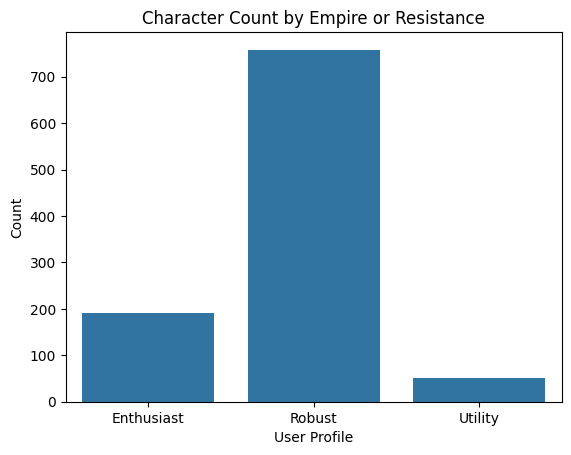

In [7]:
# Plotting the data
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting using Seaborn
sns.barplot(data=user_profile_group, x='user_profile', y='count')
plt.title('Character Count by Empire or Resistance')
plt.xlabel('User Profile')
plt.ylabel('Count')
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create a copy of the dataframe
trained_df = car_df.copy()

# Use LabelEncoder for 'make'
le_make = LabelEncoder()
trained_df['make'] = le_make.fit_transform(trained_df['make'])


# Use LabelEncoder for 'user_profile'
le_user_profile = LabelEncoder()
trained_df['user_profile'] = le_user_profile.fit_transform(trained_df['user_profile'])


# Normalize numerical features
scaler = StandardScaler()
numerical_features = ['horsepower', 'rental_price']
trained_df[numerical_features] = scaler.fit_transform(trained_df[numerical_features])

# Prepare the features (X) and target (y)
X = trained_df[['make'] + numerical_features]
y = trained_df['user_profile']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X: ", X.head(10))
print("y: ", y.head(10))

X:     make  horsepower  rental_price
0     3    0.289372     -1.062560
1     5   -0.908765      1.642042
2     2    0.079479      0.291390
3     0   -0.182886     -0.101662
4     2    0.761630      1.333016
5     4    0.656684      1.165653
6     5   -0.865037      1.421754
7     3    0.000770      1.459055
8     5   -0.698872      1.350379
9     0    1.714892      0.355660
y:  0    1
1    1
2    1
3    0
4    1
5    0
6    1
7    1
8    1
9    0
Name: user_profile, dtype: int64


In [9]:
# training the model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Predict and evaluate
y_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print(classification_report(y_test, y_pred))

Accuracy: 97.00%
              precision    recall  f1-score   support

           0       0.94      0.94      0.94        33
           1       0.98      0.98      0.98       159
           2       0.88      0.88      0.88         8

    accuracy                           0.97       200
   macro avg       0.93      0.93      0.93       200
weighted avg       0.97      0.97      0.97       200



In [11]:
import pickle

# Save the model
with open('knn_model.pkl', 'wb') as f:
    pickle.dump(knn, f)

# Save the LabelEncoders
with open('le_make.pkl', 'wb') as f:
    pickle.dump(le_make, f)

with open('le_user_profile.pkl', 'wb') as f:
    pickle.dump(le_user_profile, f)

# Save the StandardScaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
